In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

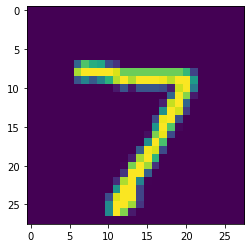

In [6]:
# Let's check one image
img = X_test[0]
# img  # will be in form of array
plt.imshow(img)

In [7]:
# Let's resize the image
X_train = X_train/255
X_test = X_test/255

In [8]:
# Let's change the y_train to categorical values
from tensorflow.keras.utils import to_categorical

In [9]:
y_train_encoded = to_categorical(y_train,num_classes=10)

In [10]:
y_test_encoded = to_categorical(y_test,num_classes=10)

In [11]:
# Let's reshape the X_train and X_test
X_train = np.expand_dims(X_train,axis=-1)

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
X_test = np.expand_dims(X_test,axis=-1)

In [14]:
# Let's import libraries to train our model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
# Model:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=3,input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=3))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())

model.add(Dense(128,activation ='relu'))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [16]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [17]:
model.fit(X_train,y_train_encoded,validation_data=(X_test,y_test_encoded),epochs=300,callbacks=[early_stop],batch_size=32)

Epoch 1/300
1875/1875 [==============================] - 100s 51ms/step - loss: 0.2779 - accuracy: 0.9137 - val_loss: 0.0494 - val_accuracy: 0.9827
Epoch 2/300
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0438 - accuracy: 0.9859 - val_loss: 0.0316 - val_accuracy: 0.9896
Epoch 3/300
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.0339 - val_accuracy: 0.9905
Epoch 4/300
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.0411 - val_accuracy: 0.9880


In [18]:
losses = pd.DataFrame(model.history.history)

In [19]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.128570,0.960850,0.049395,0.9827
1,0.043441,0.986100,0.031633,0.9896
2,0.030370,0.990167,0.033899,0.9905
3,0.023572,0.992617,0.041134,0.9880


<AxesSubplot:>

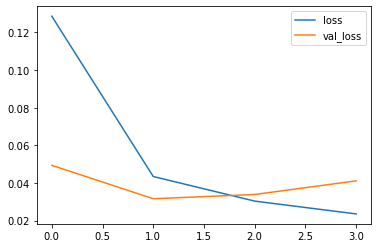

In [20]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

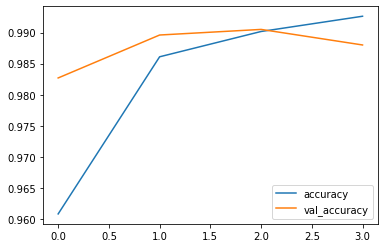

In [21]:
losses[['accuracy','val_accuracy']].plot()

In [22]:
prediction = model.predict(X_test)

In [23]:
prediction = np.argmax(prediction,axis = 1)

In [24]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [28]:
model.save('mnist_app.h5')

In [29]:
# Testing it on one one single image

In [31]:
import cv2

In [32]:
img = cv2.imread('six.png')

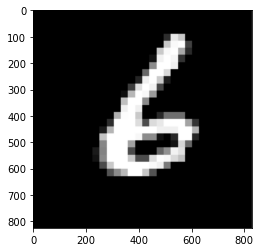

In [43]:
plt.imshow(img)

In [33]:
img.shape

(825, 829, 3)

In [34]:
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [35]:
imgGray.shape

(825, 829)

In [36]:
imgResize = cv2.resize(imgGray,(28,28))

In [37]:
imgReshape = np.expand_dims(imgResize,axis=-1)

In [38]:
imgReshape.shape

(28, 28, 1)

In [39]:
final_image = np.expand_dims(imgReshape,axis=0)

In [40]:
final_image.shape

(1, 28, 28, 1)

In [41]:
single_predict = model.predict(final_image)

In [42]:
single_predict.argmax()

6

In [44]:
# 2nd Prediction - this time on color image
nine = cv2.imread('nine.png')

In [45]:
nine.shape

(600, 600, 3)

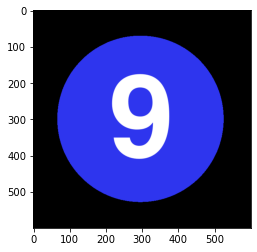

In [46]:
plt.imshow(nine)

In [47]:
# Let's first convert it into grey image
nineGray = cv2.cvtColor(nine,cv2.COLOR_BGR2GRAY)

# Let's check the shape again
nineGray.shape

(600, 600)

In [48]:
# Let's resize it to (28,28) as that's the shape expected by model
nineResize = cv2.resize(nineGray,(28,28))

nineResize.shape

(28, 28)

In [49]:
# Last step to add the dimension  - (1,28,28,1)
nineReshape = np.expand_dims(nineResize,axis=-1)
final_image = np.expand_dims(nineReshape,axis=0)

final_image.shape

(1, 28, 28, 1)

In [50]:
# Let's feed it to the model
nine_predict = model.predict(final_image)

In [51]:
nine_predict.argmax()

9

In [53]:
# 3rd prediction on color image

In [54]:
four = cv2.imread('four.png')

# shape
four.shape

(960, 960, 3)

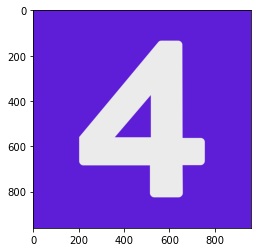

In [55]:
plt.imshow(four)

In [56]:
# Gray scale
fourGray = cv2.cvtColor(four,cv2.COLOR_BGR2GRAY)

#shape
fourGray.shape

(960, 960)

In [57]:
# resize
fourResize = cv2.resize(fourGray,(28,28))

#shape
fourResize.shape

(28, 28)

In [58]:
# reshape
fourReshape = np.expand_dims(fourResize,axis=-1)
final_four = np.expand_dims(fourReshape,axis=0)

In [59]:
final_four.shape

(1, 28, 28, 1)

In [60]:
predict_four = model.predict(final_four)

In [61]:
predict_four

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [62]:
predict_four.argmax()

4

# Thank You